In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import load_iris # dataset-eg-3

# Two Layer Neural Network

In [5]:
class Neural_Network:
    
    def __init__(self,learning_rate=0.01,num_iters=1000,verbose=True,layer_dims =[2,3,1]):
        self.learning_rate = learning_rate
        self.num_iters = num_iters
        self.layer_dims = layer_dims
        self.verbose = verbose
        self.weights = []
        
    def sigmoid(self,z,deriv=False):
        a = 1/(1+np.exp(-z))
        if deriv:
            return a*(1-a)
        return a
    
    def relu(self,z,deriv=False):
        if deriv:
            z[z<=0] = 0
            z[z>0] = 1
            return z
        return np.maximum(0,z)
    
    def loss(self,y,p):
        return np.sum(-y*np.log(p)-(1-y)*np.log(1-p))  # Optional - Include (1/y.shape[1]) 
        
    def fit(self,X,Y):
        
        W1 = np.random.randn(self.layer_dims[1],self.layer_dims[0])/np.sqrt(self.layer_dims[0]) # Vanishing/Exploding Gradients :) 
        W2 = np.random.randn(self.layer_dims[2],self.layer_dims[1])/np.sqrt(self.layer_dims[1]) 
        b1 = np.random.randn(self.layer_dims[1],self.layer_dims[2]) 
        b2 = np.random.randn(self.layer_dims[2],self.layer_dims[2]) 

        for i in range(self.num_iters):

            # Forward Propogation
            Z1 = np.dot(W1,X)+b1  
            A1 = self.sigmoid(Z1)      
            Z2 = np.dot(W2,A1)+b2    
            A2 = self.sigmoid(Z2)       

            if self.verbose and i%(self.num_iters//10)==0:
                print('Cost at',i,'iteration:',self.loss(Y,A2))

            # Backward Propogation
            dA2 = -np.divide(Y,A2) + np.divide(1-Y,1-A2)
            dZ2 = dA2*self.sigmoid(Z2,deriv=True)    
            dW2 = (1/A1.shape[1])*np.dot(dZ2,A1.T)    
            db2 = (1/A1.shape[1])*np.dot(dZ2,np.ones((dZ2.shape[1],1)))

            dA1 = np.dot(W2.T,dZ2)
            dZ1 = dA1*self.sigmoid(Z1,deriv=True)   
            dW1 = (1/X.shape[1])*np.dot(dZ1,X.T)
            db1 = (1/X.shape[1])*np.dot(dZ1,np.ones((dZ1.shape[1],1)))
            
            # Updating Weights
            W1= W1 - self.learning_rate*dW1
            b1= b1 - self.learning_rate*db1
            W2= W2 - self.learning_rate*dW2
            b2= b2 - self.learning_rate*db2

        self.weights = [W1,b1,W2,b2]

        
    def predict(self,X,keep_probs=False,threshold=0.5):
        [W1,b1,W2,b2] = self.weights
        
        Z1 = np.dot(W1,X)+b1  
        A1 = self.sigmoid(Z1)      
        Z2 = np.dot(W2,A1)+b2    
        A2 = self.sigmoid(Z2)   
        
        if not keep_probs:
            return np.array([1 if v>threshold else 0 for v in A2.T]).reshape(1,-1)
        else:
            return A2
        
    def classification_report(self,X,y):
        p = self.predict(X) 
        cm_df = pd.crosstab(p.reshape(y.shape[1],),y.reshape(y.shape[1],),rownames=['Predicted'],colnames=['Actual'])
        if list(cm_df.index)==[1]:
            cm_df.loc[0,:] = [0,0]
        elif list(cm_df.index)==[0]:
            cm_df.loc[1,:] = [0,0]
        
        cm_df = cm_df.sort_index()
        print('\nConfusion Matrix:\n',cm_df)
        TN = cm_df.loc[0,0] # Predicted = 0 and  Actual = 0
        TP = cm_df.loc[1,1] # Predicted = 1 and  Actual = 1
        FN = cm_df.loc[0,1] # Predicted  = 0 But Actual = 1
        FP = cm_df.loc[1,0] # Predicted  = 1 But Actual = 0

        acc = (TP+TN)/(TP+TN+FP+FN)
        tpr = recall = TP/(TP+FN) # Recall / Sensitivity / True Positive Rate
        tnr = TN/(TN+FP) # Specificity / True Negative Rate
        precision = TP/(TP+FP) # Precision
        f1_score = 2*precision*recall/(precision+recall) # F1-Score

        return pd.DataFrame({
        'Accuracy':acc.round(3)*100,
        'True Positive Rate':recall.round(3)*100,
        'True Negative Rate':tnr.round(3)*100,
        'Precision':precision.round(3)*100,
        'F1_Score':f1_score.round(3)*100},index=['Perc']).T
        
        

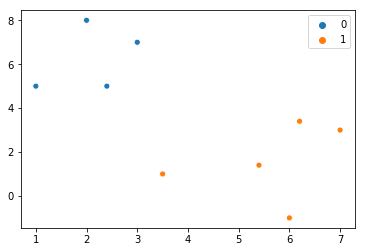

In [6]:
# Input - 1

X = np.array([[1, 5],[ 2,  8],[ 3,  7],[ 2.4,  5],
       [ 5.4,  1.4],[ 6.2,  3.4],[ 3.5,  1],
       [ 6, -1],
       [ 7,  3]])

Y = np.array([0,0,0,0,1,1,1,1,1])

sns.scatterplot(X[:,0],X[:,1],hue=Y)

X = X.T
Y = Y.reshape(1,-1)

In [7]:
model  = Neural_Network(verbose=False)
model.fit(X,Y)
pred = model.predict(X)
model.classification_report(X,Y)


Confusion Matrix:
 Actual     0  1
Predicted      
0          4  0
1          0  5


,Perc
Accuracy,100.0
True Positive Rate,100.0
True Negative Rate,100.0
Precision,100.0
F1_Score,100.0


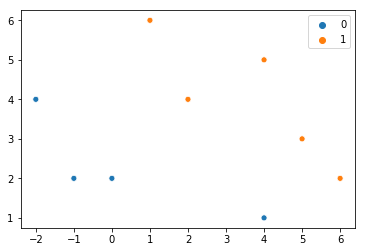

In [8]:
# Input - 2
X = np.array(
    [
    [-1,2],[0,2],[-2,4],[4,1],
    [1, 6],[4,5],[5,3],[2, 4],[6, 2]
    ])
Y = np.array([0,0,0,0,1,1,1,1,1])

sns.scatterplot(X[:,0],X[:,1],hue=Y)

X = X.T
Y = Y.reshape(1,-1)

In [12]:
model  = Neural_Network(verbose=True,learning_rate=0.1,num_iters=1300)
model.fit(X,Y)
pred = model.predict(X)
model.classification_report(X,Y)

Cost at 0 iteration: 9.258147931463892
Cost at 130 iteration: 4.211305248961987
Cost at 260 iteration: 3.522888518323206
Cost at 390 iteration: 3.05873836514476
Cost at 520 iteration: 2.6718555462999163
Cost at 650 iteration: 2.3351219249751867
Cost at 780 iteration: 2.038484082346695
Cost at 910 iteration: 1.777725612512895
Cost at 1040 iteration: 1.5503858577208276
Cost at 1170 iteration: 1.3541031825572203

Confusion Matrix:
 Actual     0  1
Predicted      
0          4  0
1          0  5


,Perc
Accuracy,100.0
True Positive Rate,100.0
True Negative Rate,100.0
Precision,100.0
F1_Score,100.0


In [13]:
# Input - 3
iris = load_iris()
X = iris.data[:,:2]
Y = (iris.target!=0)*1

X = X.T
Y = Y.reshape(1,-1)

In [14]:
model  = Neural_Network(verbose=False,layer_dims=[X.shape[0],4,1],learning_rate=0.01,num_iters=10000)
model.fit(X,Y)
model.classification_report(X,Y)


Confusion Matrix:
 Actual      0    1
Predicted         
0          49    0
1           1  100


,Perc
Accuracy,99.3
True Positive Rate,100.0
True Negative Rate,98.0
Precision,99.0
F1_Score,99.5


# Notes

1. I have tried to make code as simpler as possible.<br>
2. Implemented 2 layer Neural Network only.<br>
3. I have used Sigmoid as Activation function, Relu can also be used. Learn other activation functions as well.
4. Softmax function is not included.